In [2]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem

## [Substructure Searching](https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-searching)

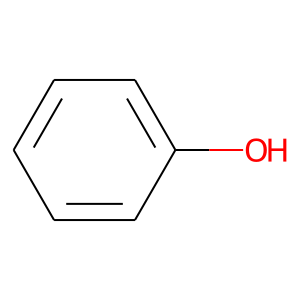

In [3]:
from rdkit.Chem import AllChem as Chem
m = Chem.MolFromSmiles("c1ccccc1O")
Draw.MolToImage(m)

In [4]:
patt = Chem.MolFromSmarts("ccO")
m.HasSubstructMatch(patt)

True

In [5]:
m.GetSubstructMatch(patt)

(0, 5, 6)

In [6]:
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

## [Chemical Transformations](https://www.rdkit.org/docs/GettingStartedInPython.html#chemical-transformations)

### [Substructure-based transformations](https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-based-transformations)

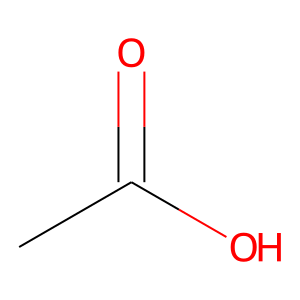

In [7]:
m2 = Chem.MolFromSmiles("CC(=O)O")
Draw.MolToImage(m2)

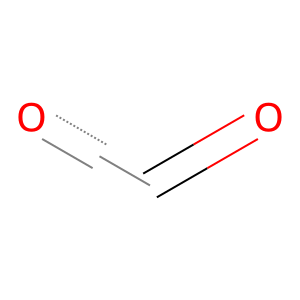

In [8]:
patt2 = Chem.MolFromSmarts("C(=O)[OH]")
Draw.MolToImage(patt2)


In [9]:
rm = AllChem.DeleteSubstructs(m2, patt2)
Chem.MolToSmiles(rm)

'C'

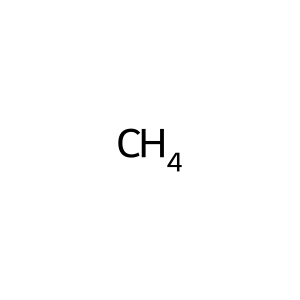

In [10]:
Draw.MolToImage(rm)

In [11]:
repl3 = Chem.MolFromSmiles("OC")
patt3 = Chem.MolFromSmarts("[$(NC(=O))]")
m3 = Chem.MolFromSmiles("CC(=O)N")
rms = AllChem.ReplaceSubstructs(m3, patt3, repl3)
Chem.MolToSmiles(rms[0])


'COC(C)=O'

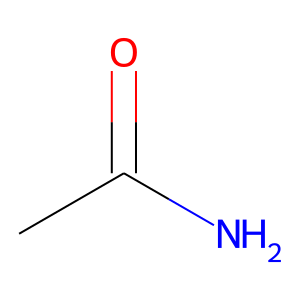

In [12]:
Draw.MolToImage(m3)

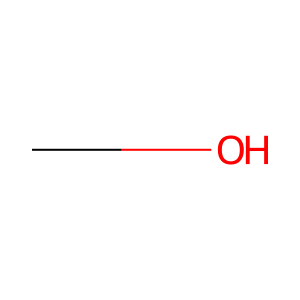

In [13]:
Draw.MolToImage(repl3)

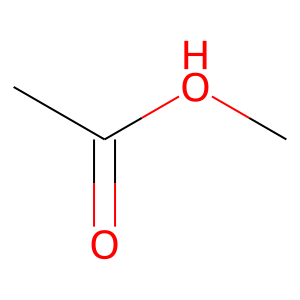

In [14]:
Draw.MolToImage(rms[0])

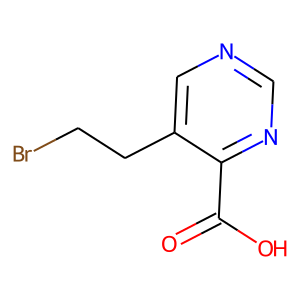

In [15]:
m4 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
no_side_chains = Chem.ReplaceSidechains(m4,core)
Draw.MolToImage(m4)

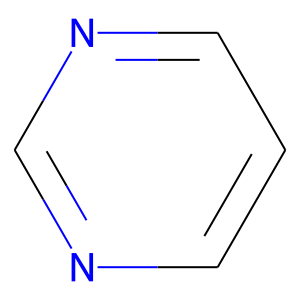

In [16]:
Draw.MolToImage(core)

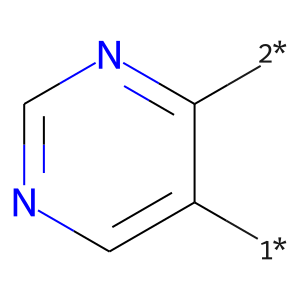

In [17]:
Draw.MolToImage(no_side_chains)

In [18]:
tmp = Chem.ReplaceCore(m4,core)
rs = Chem.GetMolFrags(tmp,asMols=True)
len(rs)

2

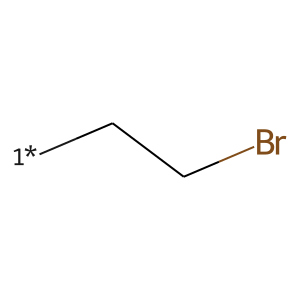

In [19]:
Draw.MolToImage(rs[0])

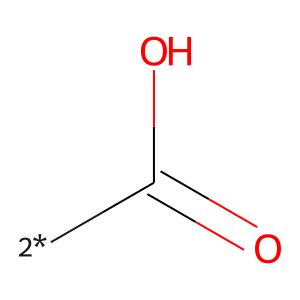

In [20]:
Draw.MolToImage(rs[1])

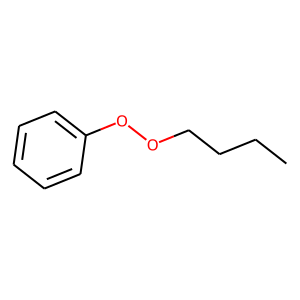

In [21]:
from rdkit.Chem.Scaffolds import MurckoScaffold
m = Chem.MolFromSmiles("c1ccccc1OOCCCC")
Draw.MolToImage(m)

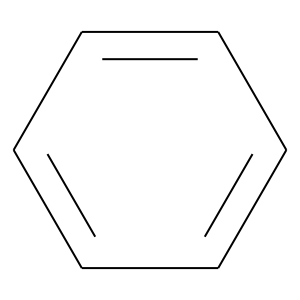

In [22]:
# with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
#     m1 = cdk2mols[0]
# core = MurckoScaffold.GetScaffoldForMol(m1)
core = MurckoScaffold.GetScaffoldForMol(m)
Chem.MolToSmiles(core)
Draw.MolToImage(core)

In [23]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)

'C1CCCCC1'

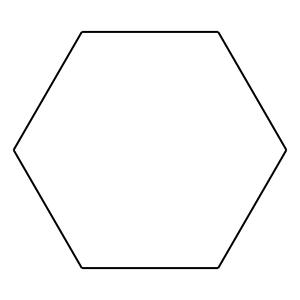

In [24]:
Draw.MolToImage(fw)

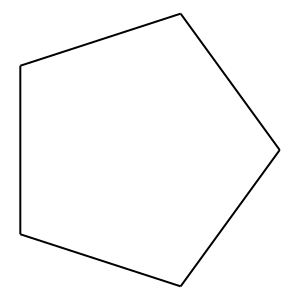

In [25]:
Draw.MolToImage(Chem.MolFromSmiles('C1CCCC1'))

In [26]:
def SmilesToMolAndImage(smiles):
    mol = Chem.MolFromSmiles(smiles)
    image = Draw.MolToImage(mol)
    return mol, image

In [27]:
def SmilesToImage(smiles):
    image = Draw.MolToImage(Chem.MolFromSmiles(smiles))
    return image

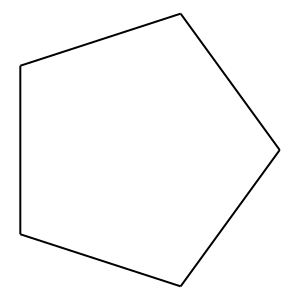

In [28]:
mol, image = SmilesToMolAndImage("C1CCCC1")
image

In [29]:
SmilesToMolAndImage("OO")

(<rdkit.Chem.rdchem.Mol at 0x7f8e01a89fa0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x7F8E3029A070>)

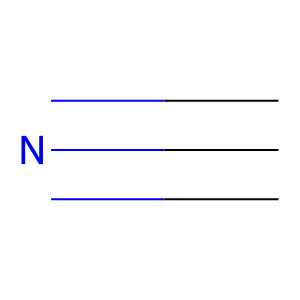

In [30]:
SmilesToImage("C#N")

In [31]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1, mol2, mol3]
res = rdFMCS.FindMCS(mols)
res.numAtoms, res.numBonds, res.smartsString, res.canceled

(10, 10, '[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]', False)

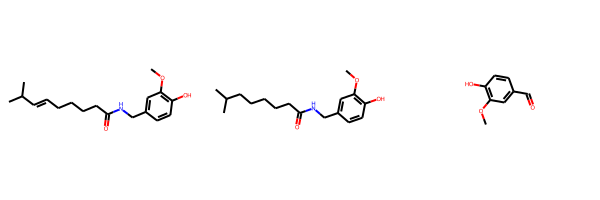

In [32]:
Draw.MolsToGridImage(mols)

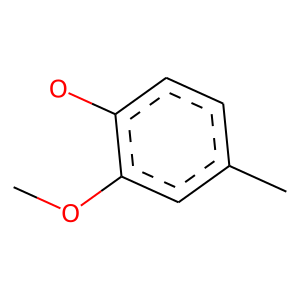

In [33]:
smart_mol = Chem.MolFromSmarts(res.smartsString)
Draw.MolToImage(smart_mol)

In [34]:
def SmilesMCStoImage(*smiles, **kwargs):
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     # print(f"{smarts=}")
     smart_mol = Chem.MolFromSmarts(smarts)
     # smarts = Draw.MolToImage(smart_mol)
     smarts_and_mols = [smart_mol] + mols
     # print(f"{mols[0]=}")
     # print(f"{mols[0].GetSubstructMatch(mcs_mol)=}")
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]
     # matches = [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     p = Chem.MolFromSmiles(smiles[0])
     # subms = [x for x in mols if x.HasSubstructMatch(p)]
     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(p)]
     # print(f"{len(subms)=}")

     Chem.Compute2DCoords(p)
     for m in subms:
          _ = AllChem.GenerateDepictionMatching2DStructure(m, p)

     return Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches)
     # return Draw.MolsToGridImage(mols, highlightAtomLists=matches)

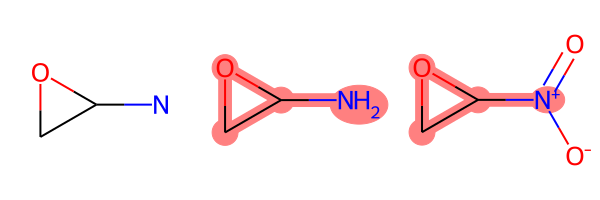

In [35]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]")

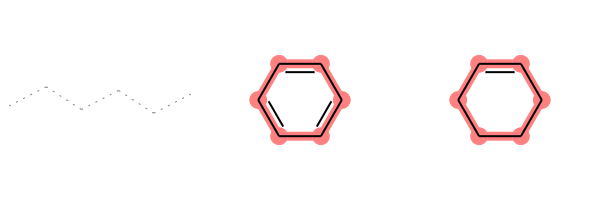

In [36]:
SmilesMCStoImage("c1ccccc1", "C1CCCC=C1")

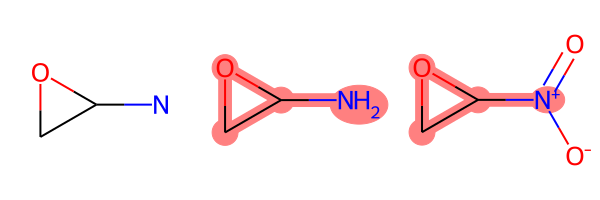

In [37]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]")

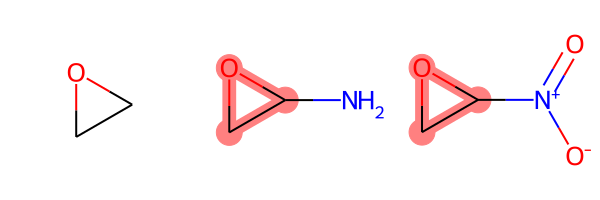

In [38]:
SmilesMCStoImage("NC1OC1", "C1OC1[N+](=O)[O-]", matchValences=True)

In [39]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.6

In [40]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity)

0.75

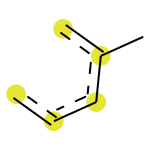

In [41]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
bi[872]
# ((6, 2),)
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]
# [[0, 1, 9, 5, 4], [2, 3, 4, 9, 5]]
Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)

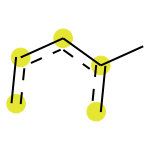

In [42]:
Draw.DrawRDKitBit(mol, 1553, rdkbi, whichExample=1, useSVG=True)

## [Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation)

In [43]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
Descriptors.TPSA(m)

37.3

In [44]:
AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

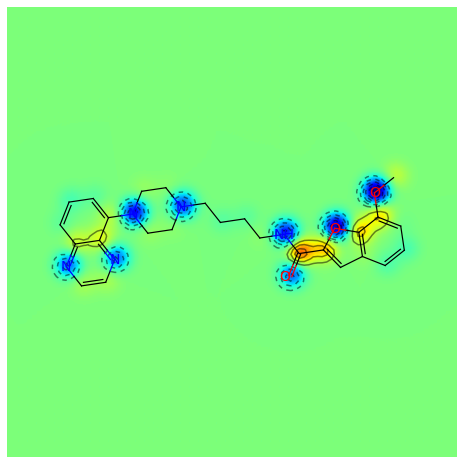

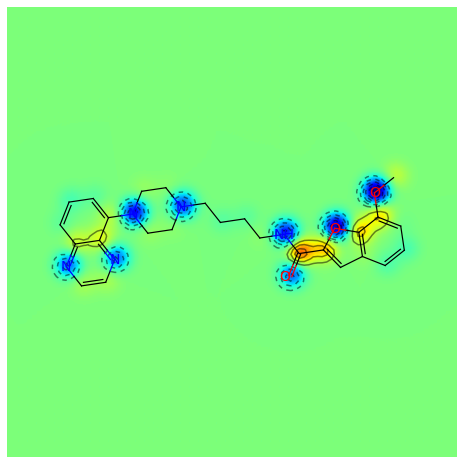

In [45]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

## [Chemical Reactions](https://www.rdkit.org/docs/GettingStartedInPython.html#chemical-reactions)

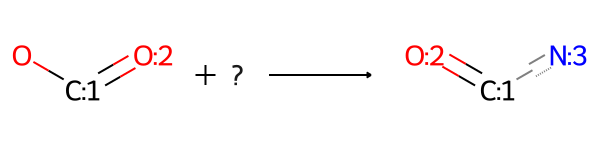

In [46]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
rxn

In [47]:
rxn.GetNumProductTemplates()

1

In [48]:
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC')))

In [49]:
a = Chem.MolToSmiles(ps[0][0])
a

'CNC(C)=O'

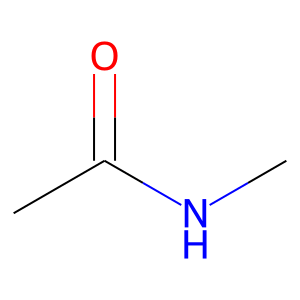

In [50]:
Draw.MolToImage(ps[0][0])

#Improve: Unclear what reaction(s) this sequence of commands is depicting

#Improve: Make files available, e.g. by making the accessible from URLs, or at least by making them downloadable (e.g., let user download files for entire tutorial at once)

### [Drawing Chemical Reactions](https://www.rdkit.org/docs/GettingStartedInPython.html#drawing-chemical-reactions)

In [51]:
from rdkit.Chem import Draw
rxn = AllChem.ReactionFromSmarts('[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])O.[N-:13]=[N+:14]=[N-:15]>C(Cl)Cl.C(=O)(C(=O)Cl)Cl>[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])[N:13]=[N+:14]=[N-:15]',useSmiles=True)
d2d = Draw.MolDraw2DCairo(800, 300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
# open('./images/reaction1_highlight.o.png','wb+').write(png)
open('reaction1.o.png','wb+').write(png)

22536

#Improve: The given command `open('./images/reaction1_highlight.o.png','wb+').write(png)` assumes you have folder with that name already; should write directly to current folder

#Improve: Even better, write directly to the screen, not to a PNG file that has to be opened

In [52]:
d2d_highlight = Draw.MolDraw2DCairo(800, 300)
d2d_highlight.DrawReaction(rxn,highlightByReactant=True)
png_highlight = d2d_highlight.GetDrawingText()
open('reaction1_highlight.o.png','wb+').write(png_highlight)

24430

In [53]:
newRxn = AllChem.ReactionFromPNGString(png)
AllChem.ReactionToSmarts(newRxn)

'[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#8].[#7-:13]=[#7+:14]=[#7-:15]>[#6](-[#17])-[#17].[#6](=[#8])(-[#6](=[#8])-[#17])-[#17]>[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#7:13]=[#7+:14]=[#7-:15]'

### [Recap Implementation](https://www.rdkit.org/docs/GettingStartedInPython.html#recap-implementation)

In [54]:
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)
type(hierarch)

rdkit.Chem.Recap.RecapHierarchyNode

In [55]:
hierarch.smiles

'CCC(=O)OCCOc1ccccc1'

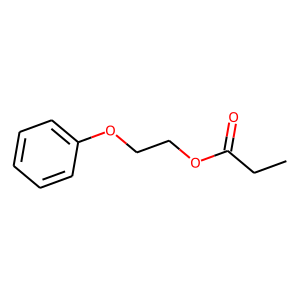

In [56]:
Draw.MolToImage(m)

In [57]:
ks = hierarch.children.keys()
sorted(ks)

['*C(=O)CC', '*CCOC(=O)CC', '*CCOc1ccccc1', '*OCCOc1ccccc1', '*c1ccccc1']

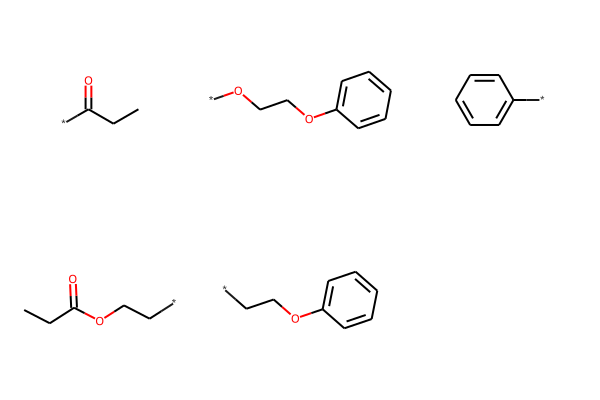

In [58]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in ks])

In [59]:
leafs = hierarch.GetLeaves().keys()
leafs = sorted(leafs)
leafs

['*C(=O)CC', '*CCO*', '*CCOc1ccccc1', '*c1ccccc1']

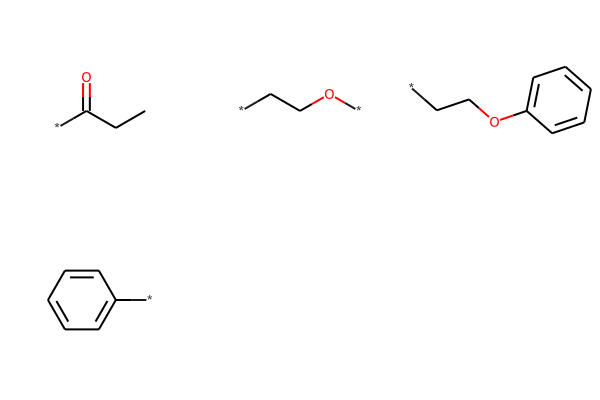

In [60]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in leafs])

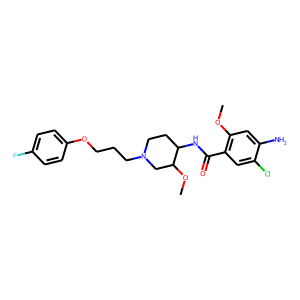

In [61]:
cisapride = Chem.MolFromSmiles('Clc1cc(c(OC)cc1N)C(=O)NC3CCN(CCCOc2ccc(F)cc2)CC3OC')
Draw.MolToImage(cisapride)

In [62]:
hierarch = Recap.RecapDecompose(cisapride)
ks = hierarch.children.keys()
sorted(ks)

['*C(=O)c1cc(Cl)c(N)cc1OC',
 '*CCCN1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1',
 '*CCCOc1ccc(F)cc1',
 '*N1CCC(NC(=O)c2cc(Cl)c(N)cc2OC)C(OC)C1',
 '*NC1CCN(CCCOc2ccc(F)cc2)CC1OC',
 '*c1ccc(F)cc1']

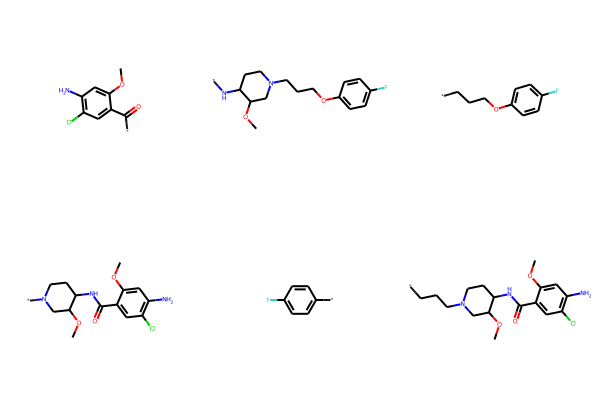

In [63]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in ks])

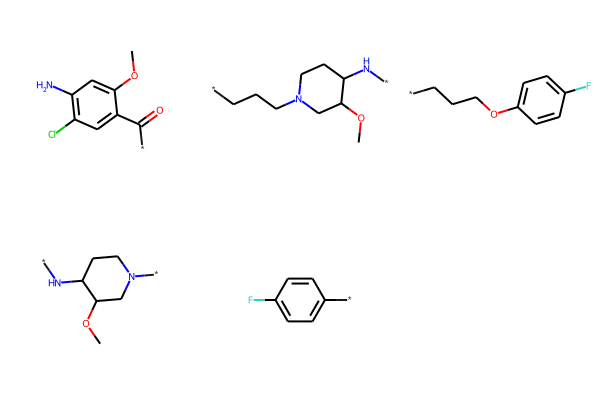

In [64]:
leafs = hierarch.GetLeaves().keys()
leafs = sorted(leafs)
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in leafs])

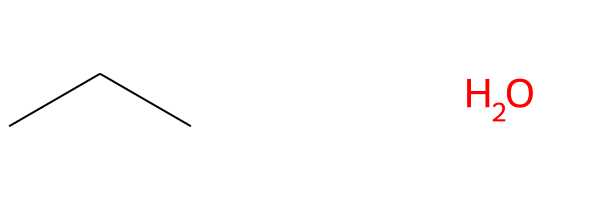

In [65]:
smiles = ["CCC", "", "O"]
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in smiles])

### [Other fragmentation approaches](https://www.rdkit.org/docs/GettingStartedInPython.html#other-fragmentation-approaches)

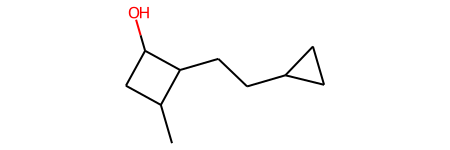

In [106]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
m

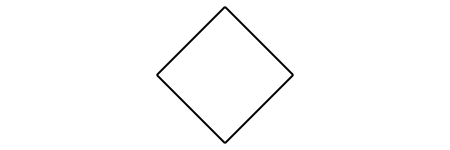

In [116]:
m2 = Chem.MolFromSmiles('C1CCC1')
m2

In [121]:
match = '[#6]1-[#6]-[#6]-[#6]-1'
# inside_outside = m2.GetSubstructMatches(Chem.MolFromSmarts(match))
inside_outside = m2.GetSubstructMatches(Chem.MolFromSmarts(match[!match]))
inside_outside

SyntaxError: invalid syntax (900385133.py, line 3)

In [111]:
# SMARTS: [R] means atom in a ring, [!R] means atom not in a ring
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[R][!R]'))
bis

((1, 0), (3, 4), (5, 6), (8, 7))

In [112]:
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
bs

[0, 3, 5, 7]

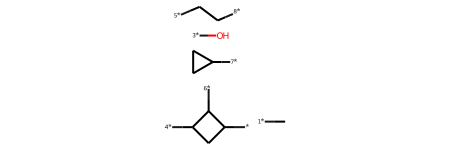

In [113]:
nm = Chem.FragmentOnBonds(m,bs)
nm

In [110]:
Chem.MolToSmiles(nm,True)

'*C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1'

## Advanced Topics/Warnings

### Editing Molecules

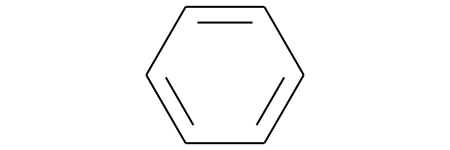

In [66]:
m = Chem.MolFromSmiles("c1ccccc1")
m

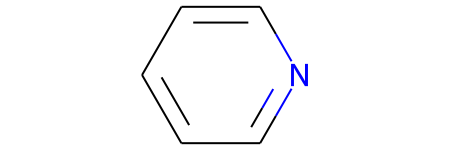

In [67]:
m.GetAtomWithIdx(0).SetAtomicNum(7)
Chem.SanitizeMol(m)
m

In [68]:
Chem.MolToSmiles(m)

'c1ccncc1'

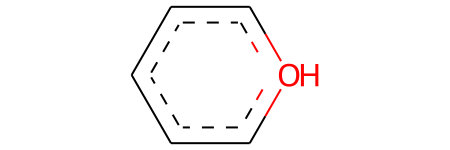

In [69]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetAtomWithIdx(0).SetAtomicNum(8)
m

In [70]:
Chem.MolToSmiles(m)

'c1ccocc1'

In [71]:
Chem.SanitizeMol(m)

[21:59:33] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5

More complex transformations can be carried out using the rdkit.Chem.rdchem.RWMol class:

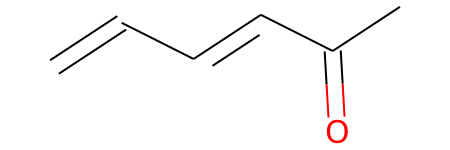

In [ ]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
m

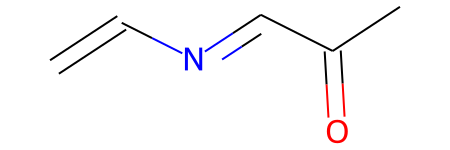

In [ ]:
mw = Chem.RWMol(m)
mw.ReplaceAtom(4, Chem.Atom(7))
mw

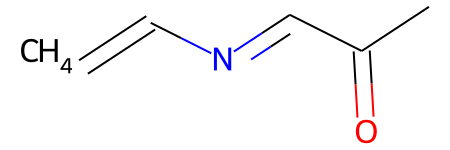

In [ ]:
mw.AddAtom(Chem.Atom(6))
mw

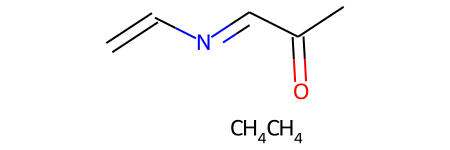

In [ ]:
mw.AddAtom(Chem.Atom(6))
mw

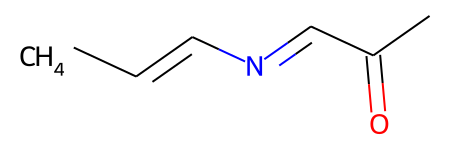

In [ ]:
mw.AddBond(6,7,Chem.BondType.SINGLE)
mw

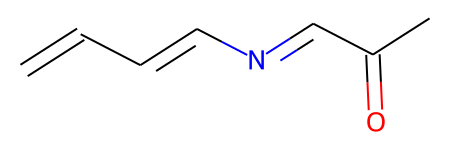

In [ ]:
mw.AddBond(7,8,Chem.BondType.DOUBLE)
mw

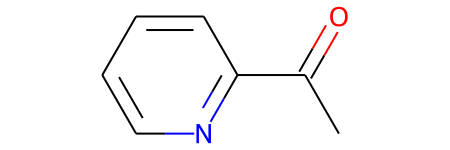

In [ ]:
mw.AddBond(8,3,Chem.BondType.SINGLE)
mw

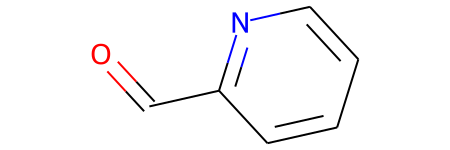

In [ ]:
mw.RemoveAtom(0)
mw

In [ ]:
mw.GetNumAtoms()

8

Sanitizing example: Converts alternating single and double bonds to an aromatic ring

In [ ]:
Chem.MolToSmiles(mw)

'O=CC1=NC=CC=C1'

In [ ]:
Chem.SanitizeMol(mw)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

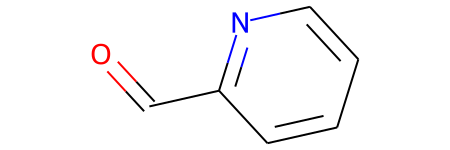

In [ ]:
mw

In [ ]:
Chem.MolToSmiles(mw)

'O=Cc1ccccn1'

Batch edits

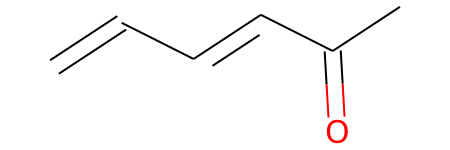

In [ ]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
m

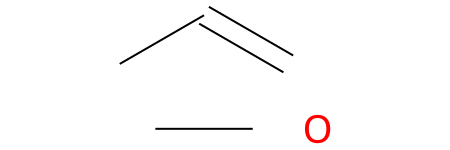

In [ ]:
mw = Chem.RWMol(m)
mw.BeginBatchEdit()
mw.RemoveAtom(3)
mw.RemoveBond(1,2)
mw.CommitBatchEdit()
mw

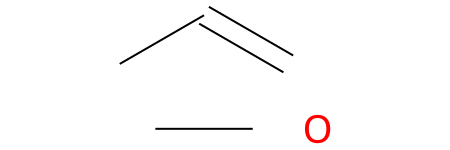

In [ ]:
with Chem.RWMol(m) as mw:
    mw.RemoveAtom(3)
    mw.RemoveBond(1,2)
    Chem.SanitizeMol(mw)
mw

## Molecule with chiral centers

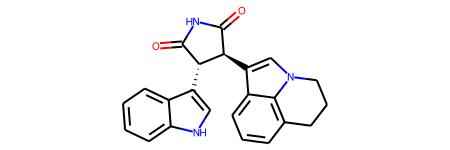

In [ ]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
mol

# [The RDKit Book](https://www.rdkit.org/docs/RDKit_Book.html)

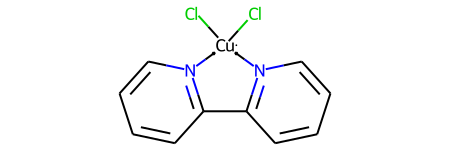

In [72]:
bipycu = Chem.MolFromSmiles('c1cccn->2c1-c1n->3cccc1.[Cu]23(Cl)Cl')
bipycu

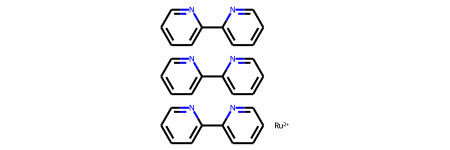

In [99]:
bipyru = Chem.MolFromSmiles('C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC=N2.[Ru+2]')
bipyru

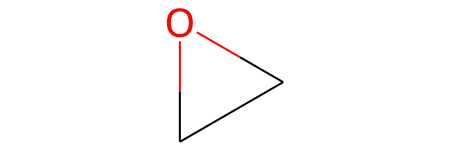

In [100]:
m = Chem.MolFromSmiles('C%(1000)OC%(1000)')
m

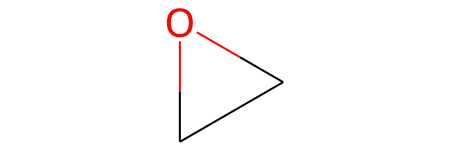

In [104]:
m = Chem.MolFromSmiles('C%(1)OC%(1)')
m